In [111]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [115]:
def get_duration(attribute_events):
    events_index = []
    for i, e in enumerate(attribute_events):
        if e != 'baseline_catch_all':
            events_index.append(i)
    events_index_orig = events_index + [1899]
    events_index_shift = [0] + events_index
    durations = np.array(events_index_orig) - np.array(events_index_shift)
    return durations[1:]

def durations_list(nfiles):
    durations = []
    for i in range(nfiles):
        filename = f"targets_attr_mvpa_{i + 1}.txt"
        data = pd.read_csv(filepath + filename, sep=" ", header=None)
        durations.append(get_duration(data[0]))

    return [item for sublist in durations for item in sublist]

scipy.stats.describe(durations_list(42))

DescribeResult(nobs=13705, minmax=(4, 24), mean=5.8165632980663995, variance=3.43190602242695, skewness=1.25661071866711, kurtosis=2.6232197188051147)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a21f5fc18>,
 'caps': [<matplotlib.lines.Line2D at 0x1a21f93358>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a21f5fd68>],
 'medians': [<matplotlib.lines.Line2D at 0x1a21f70080>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a21f46710>],
 'means': []}

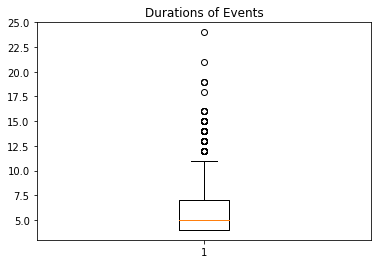

In [116]:
y = durations_list(42)
fig1, ax1 = plt.subplots()
ax1.set_title('Durations of Events')
ax1.boxplot(y)